In [1]:
import pandas as pd

## The Portal Project data

In [2]:
d = pd.read_csv('data/portal_project.tsv', delimiter='\t')

### Create separate tables

In [3]:
species = d.copy()[['species_id', 'species', 'genus', 'taxa']]
species = species.drop_duplicates()

species1 = d.copy()[['species_id', 'species', 'genus', 'taxa']].drop_duplicates()

observations = d.copy().drop(columns=['species', 'genus', 'taxa'])

### Average hindfoot length per species

In [4]:
average_length = observations.hindfoot_length.mean(skipna=True)  # skipna=True is also the default

In [5]:
average_length

29.287931802277498

In [6]:
average_length_ps = observations.groupby('species_id', as_index=False).\
    agg(mean_hf_length = ('hindfoot_length', 'mean')).\
    merge(species, how='inner')
average_length_ps.head()

,species_id,mean_hf_length,species,genus,taxa
0,AB,NaN,bilineata,Amphispiza,Bird
1,AH,33.0,harrisi,Ammospermophilus,Rodent
2,AS,NaN,savannarum,Ammodramus,Bird
3,BA,13.0,taylori,Baiomys,Rodent
4,CB,NaN,brunneicapillus,Campylorhynchus,Bird


### Ratio M/F per species per year

In [7]:
ratios = observations.\
    groupby(['species_id', 'year', 'sex'], as_index=False).\
    agg(nr = ('record_id', 'count')).\
    pivot(index = ['species_id', 'year'], columns = 'sex', values = 'nr')
ratios['mfratio'] = ratios.M / ratios.F
ratios = ratios.reset_index()

In [8]:
ratios.head()

sex,species_id,year,F,M,mfratio
0,AH,1995,NaN,1.0,NaN
1,BA,1989,NaN,3.0,NaN
2,BA,1990,8.0,3.0,0.375000
3,BA,1991,19.0,6.0,0.315789
4,BA,1992,4.0,2.0,0.500000


### Number of observations per species and year

In [9]:
obspspy = observations.\
    groupby(['species_id', 'year'], as_index=False).\
    agg(obs = ('record_id', 'count'))

obspspy['totobs'] = obspspy.groupby('species_id').obs.transform('sum')

obspspy = obspspy[obspspy.totobs > 300].\
    merge(species, how='inner')

obspspy['speciesname'] = obspspy.genus + ' ' + obspspy.species

Make a plot

In [10]:
import plotnine as p9

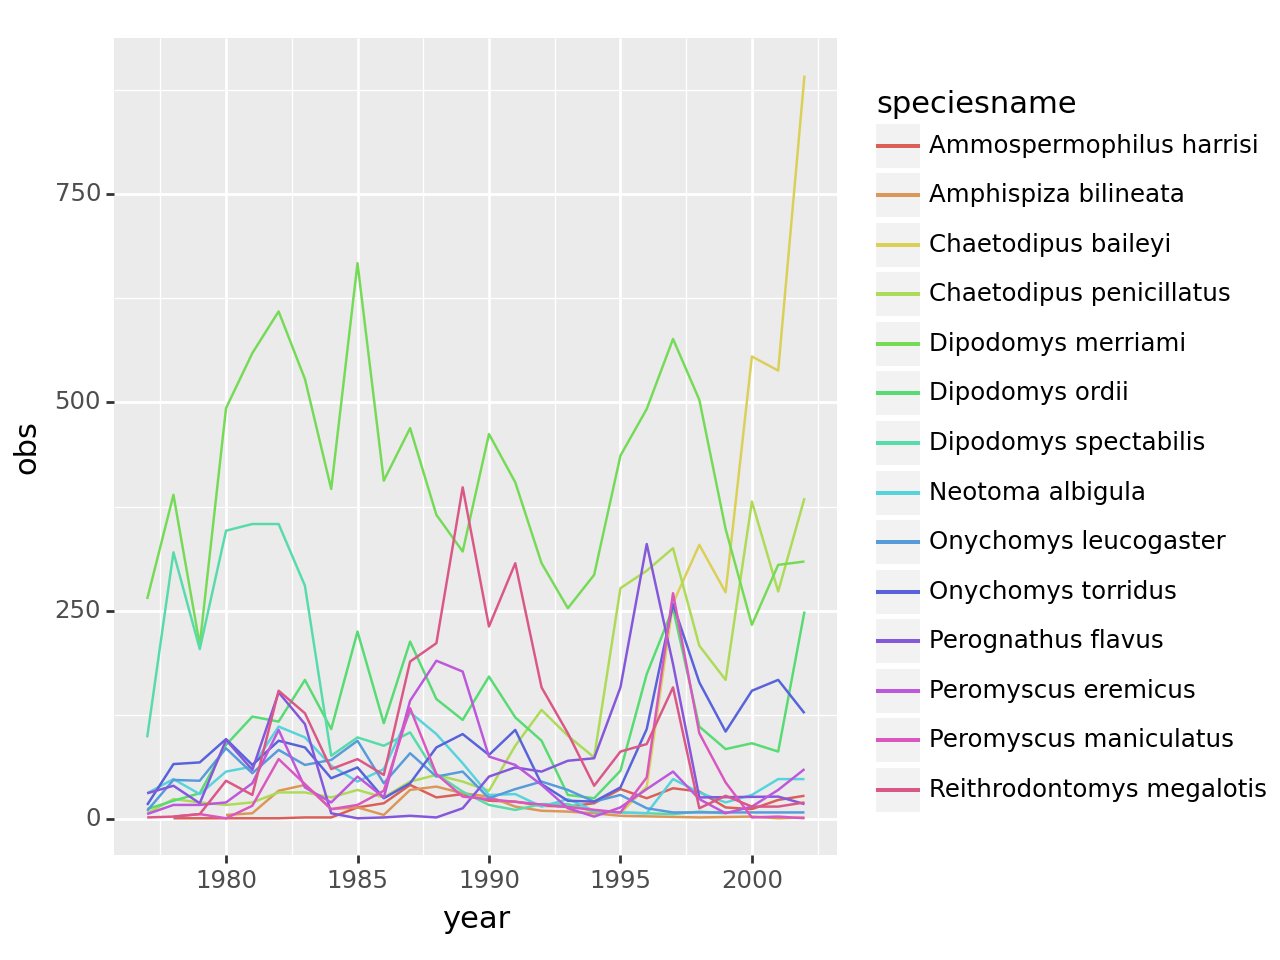

<Figure Size: (640 x 480)>

In [11]:
(
    p9.ggplot(obspspy, mapping=p9.aes(x='year', y='obs', color='speciesname')) 
    + p9.geom_line()
)

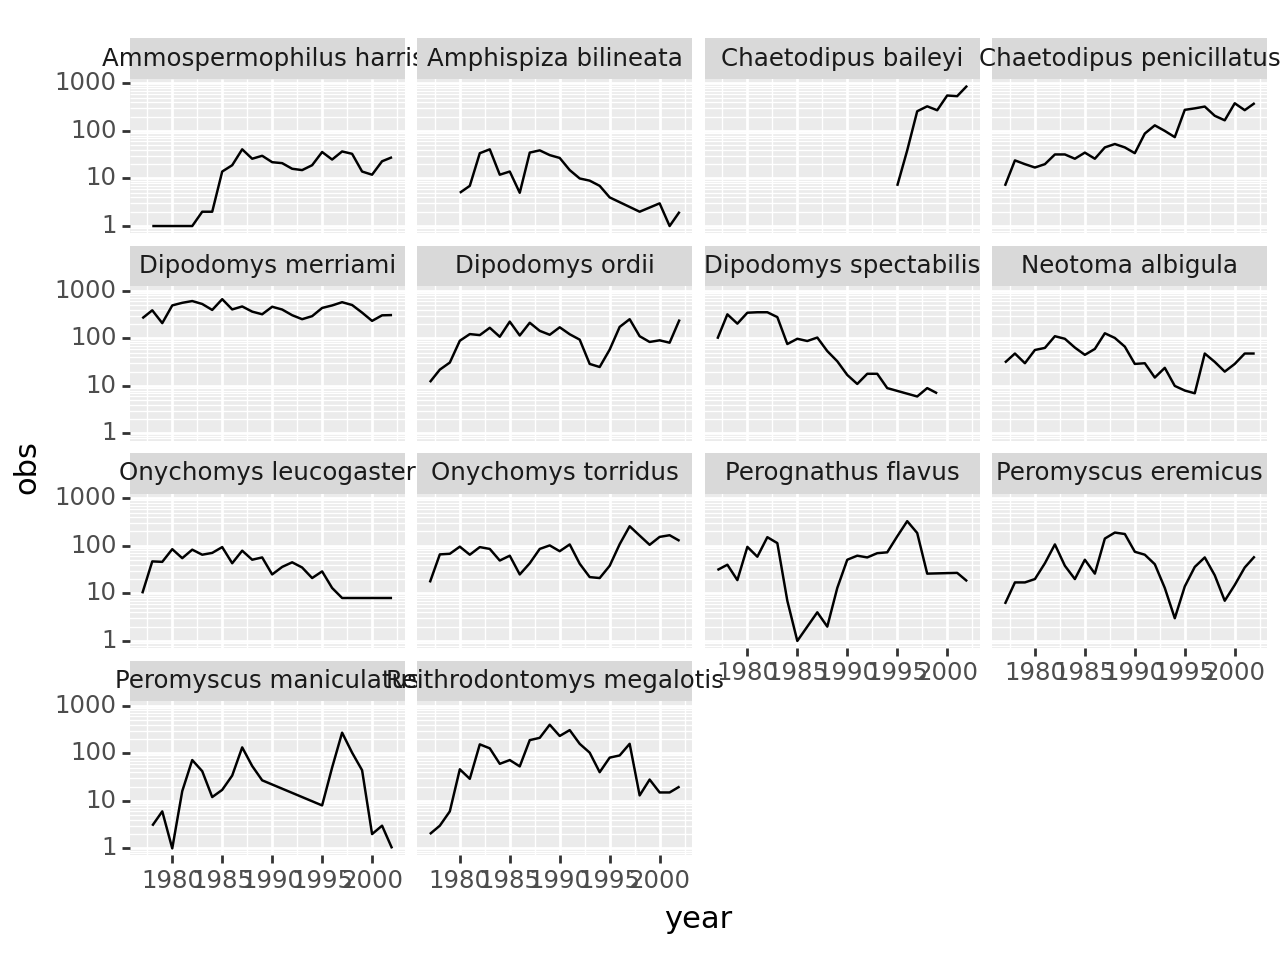

<Figure Size: (640 x 480)>

In [12]:
(
    p9.ggplot(obspspy, mapping=p9.aes(x='year', y='obs')) 
    + p9.geom_line() 
    + p9.facet_wrap('speciesname') 
    + p9.scale_y_log10()
)